In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv('features_csv/kyoto_features.csv').set_index('Date')
weather.head()

,Kyo_temp,Kyo_max,Kyo_min,Kyo_dwp,Kyo_mx_dwp,Kyo_mi_dwp,Kyo_pressure,Kyo_humidity,Kyo_wind,Kyo_clouds,...,Kyo_clouds_3,Kyo_lat_1,Kyo_lat_2,Kyo_lat_3,Kyo_lon_1,Kyo_lon_2,Kyo_lon_3,Kyo_ele_1,Kyo_ele_2,Kyo_ele_3
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,7.083333,7.375000,6.541667,0.541667,0.833333,-2.220446e-16,1017.458333,67.291667,2.833333,40.750000,...,26.041667,35.011636,35.011636,35.011636,135.768029,135.768029,135.768029,45.0,45.0,45.0
2017-01-05,6.250000,6.333333,5.875000,-3.425000,-3.341667,-3.800000e+00,1021.583333,51.625000,3.958333,68.375000,...,33.041667,35.011636,35.011636,35.011636,135.768029,135.768029,135.768029,45.0,45.0,45.0
2017-01-06,3.541667,3.583333,3.250000,-3.925000,-3.883333,-4.216667e+00,1021.958333,62.666667,2.291667,22.500000,...,24.333333,35.011636,35.011636,35.011636,135.768029,135.768029,135.768029,45.0,45.0,45.0
2017-01-07,5.416667,5.750000,5.125000,-1.466667,-1.133333,-1.758333e+00,1016.875000,65.583333,1.166667,71.375000,...,40.750000,35.011636,35.011636,35.011636,135.768029,135.768029,135.768029,45.0,45.0,45.0
2017-01-08,6.125000,6.125000,5.833333,4.091667,4.091667,3.800000e+00,1004.583333,89.833333,1.916667,79.333333,...,68.375000,35.011636,35.011636,35.011636,135.768029,135.768029,135.768029,45.0,45.0,45.0


In [3]:
weather.corr()[['Kyo_temp']].sort_values('Kyo_temp')  

,Kyo_temp
Kyo_pressure,-6.142537e-01
Kyo_pressure_3,-5.384896e-01
Kyo_pressure_1,-5.356912e-01
Kyo_pressure_2,-5.190888e-01
Kyo_lon_3,1.826575e-16
Kyo_lon_1,1.826575e-16
Kyo_lon_2,1.826575e-16
Kyo_lon,1.826575e-16
Kyo_lat_3,1.292029e-15
Kyo_lat_2,1.292029e-15


In [4]:
# remove features that have very low Correlation values
# also remove max and min temperatures since we already 
# have the mean temperatures
predictors = ['Kyo_temp_1', 'Kyo_temp_2', 'Kyo_temp_3',
       'Kyo_max_1', 'Kyo_max_2', 'Kyo_max_3', 'Kyo_min_1', 'Kyo_min_2',
       'Kyo_min_3', 'Kyo_dwp_1', 'Kyo_dwp_2', 'Kyo_dwp_3', 'Kyo_mx_dwp_1',
       'Kyo_mx_dwp_2', 'Kyo_mx_dwp_3', 'Kyo_mi_dwp_1', 'Kyo_mi_dwp_2',
       'Kyo_mi_dwp_3']

weather_2 = weather[['Kyo_temp'] + predictors]

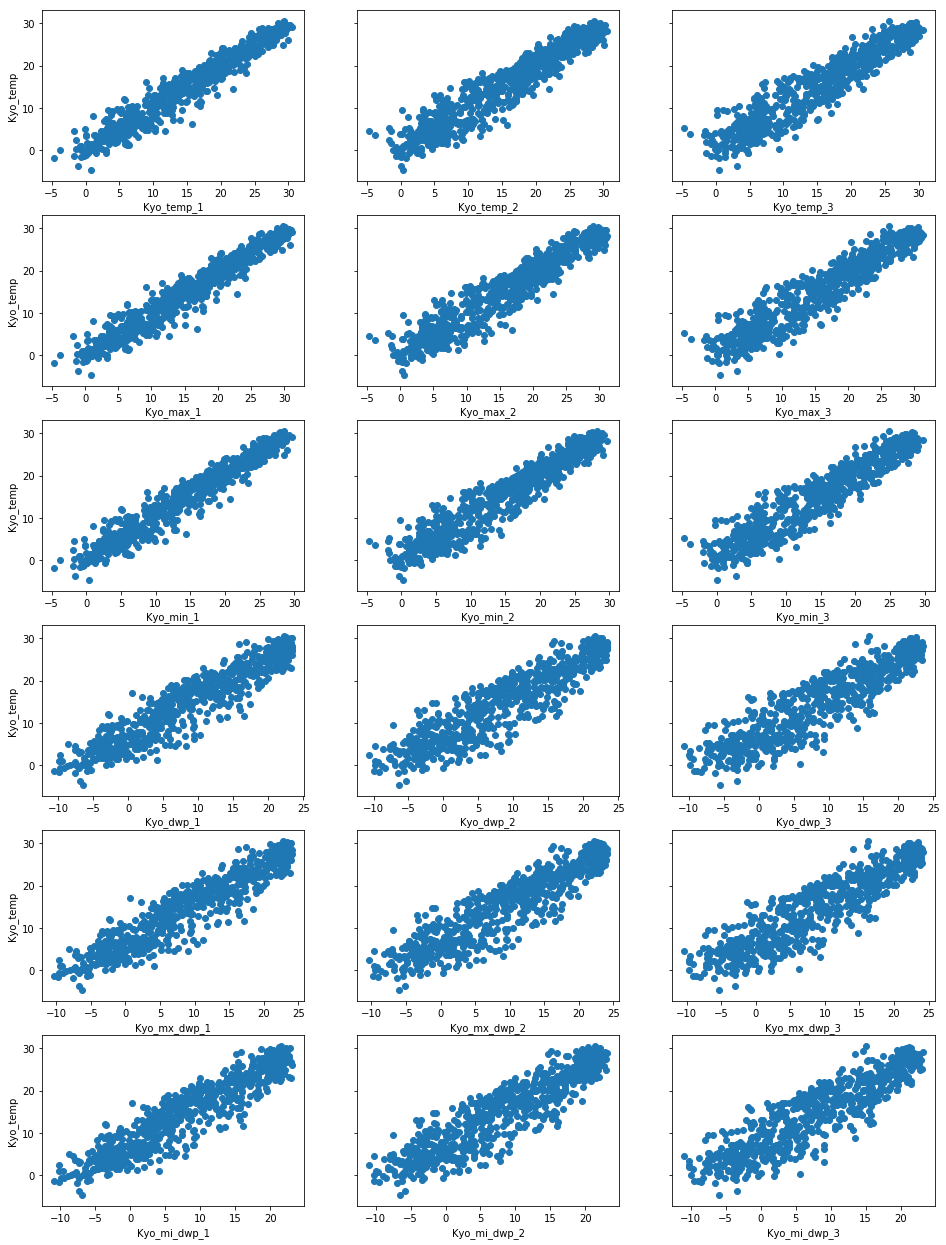

In [5]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(weather_2[feature], weather_2['Kyo_temp'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='Kyo_temp')
        else:
            axes[row, col].set(xlabel=feature)
plt.show() 

In [6]:
# set X and y values
X = weather_2[predictors]  
y = weather_2['Kyo_temp']

In [7]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Kyo_temp_1,Kyo_temp_2,Kyo_temp_3,Kyo_max_1,Kyo_max_2,Kyo_max_3,Kyo_min_1,Kyo_min_2,Kyo_min_3,Kyo_dwp_1,Kyo_dwp_2,Kyo_dwp_3,Kyo_mx_dwp_1,Kyo_mx_dwp_2,Kyo_mx_dwp_3,Kyo_mi_dwp_1,Kyo_mi_dwp_2,Kyo_mi_dwp_3
Date,,,,,,,,,,,,,,,,,,
2018-08-30,27.833333,27.458333,27.958333,28.625000,28.125000,28.541667,26.833333,26.791667,26.916667,21.325000,22.533333,21.475000,22.116667,23.200,22.058333,20.325000,21.866667,20.433333
2017-01-22,2.750000,4.458333,3.333333,2.791667,4.583333,3.458333,2.375000,4.041667,2.833333,-3.083333,-1.575000,-2.975000,-3.041667,-1.450,-2.850000,-3.458333,-1.991667,-3.475000
2017-12-12,5.478261,9.083333,3.916667,5.695652,9.583333,4.416667,5.173913,8.625000,3.541667,-4.130435,2.975000,-1.541667,-3.913043,3.475,-1.041667,-4.434783,2.516667,-1.916667
2018-01-08,3.958333,3.375000,1.708333,4.250000,3.875000,1.916667,3.625000,2.875000,1.291667,-2.983333,-1.400000,-0.275000,-2.691667,-0.900,-0.066667,-3.316667,-1.900000,-0.691667
2018-11-29,12.833333,12.375000,10.625000,13.166667,12.875000,11.000000,12.458333,11.791667,10.125000,7.758333,6.650000,5.241667,8.091667,7.150,5.616667,7.383333,6.066667,4.741667


In [8]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
# define the model
model = Ridge(alpha=0.05, normalize=True)

# traub the model/ fit the model to the traingin data
model.fit(X_train, y_train)

# predict
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [10]:
import pickle

In [11]:
# save model
with open('ridge_temp_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# use evaluation metrics to determine model performance
r2_train = r2_score(y_train, y_train_prediction)
r2_test = r2_score(y_test, y_test_prediction)
print("The R^2 score for training data is:", r2_train)
print("The R^2 score for test data is:", r2_test)

The R^2 score for training data is: 0.9441369905922543
The R^2 score for test data is: 0.9481205879008304


In [13]:
# calculate the RMSE
RSME_train = mean_squared_error(y_train, y_train_prediction)**0.5
RSME_test = mean_squared_error(y_test, y_test_prediction)**0.5

print("The RSME for training data is:", RSME_train)
print("The RSME for test data is:", RSME_test)

The RSME for training data is: 2.0536386972647995
The RSME for test data is: 2.088174107641249


In [14]:
actual_x_predicted = {
    "Actual": y_train,
    "Predicted": y_train_prediction,
    "Error": RSME_train
}
pd.DataFrame(actual_x_predicted).head()

,Actual,Predicted,Error
Date,,,
2018-08-30,28.250000,27.288125,2.053639
2017-01-22,3.083333,3.218493,2.053639
2017-12-12,2.666667,5.311929,2.053639
2018-01-08,9.291667,3.644809,2.053639
2018-11-29,9.500000,12.386656,2.053639


In [15]:
# Test with Manly features
manly = pd.read_csv('features_csv/manly_features.csv').set_index('Date')
manly.columns

Index(['Man_temp', 'Man_max', 'Man_min', 'Man_dwp', 'Man_mx_dwp', 'Man_mi_dwp',
       'Man_pressure', 'Man_humidity', 'Man_wind', 'Man_clouds', 'Man_lat',
       'Man_lon', 'Man_ele', 'Man_temp_1', 'Man_temp_2', 'Man_temp_3',
       'Man_max_1', 'Man_max_2', 'Man_max_3', 'Man_min_1', 'Man_min_2',
       'Man_min_3', 'Man_dwp_1', 'Man_dwp_2', 'Man_dwp_3', 'Man_mx_dwp_1',
       'Man_mx_dwp_2', 'Man_mx_dwp_3', 'Man_mi_dwp_1', 'Man_mi_dwp_2',
       'Man_mi_dwp_3', 'Man_pressure_1', 'Man_pressure_2', 'Man_pressure_3',
       'Man_clouds_1', 'Man_clouds_2', 'Man_clouds_3', 'Man_lat_1',
       'Man_lat_2', 'Man_lat_3', 'Man_lon_1', 'Man_lon_2', 'Man_lon_3',
       'Man_ele_1', 'Man_ele_2', 'Man_ele_3'],
      dtype='object')

In [16]:
manly_predictors = ['Man_temp_1', 'Man_temp_2', 'Man_temp_3',
       'Man_max_1', 'Man_max_2', 'Man_max_3', 'Man_min_1', 'Man_min_2',
       'Man_min_3', 'Man_dwp_1', 'Man_dwp_2', 'Man_dwp_3', 'Man_mx_dwp_1',
       'Man_mx_dwp_2', 'Man_mx_dwp_3', 'Man_mi_dwp_1', 'Man_mi_dwp_2',
       'Man_mi_dwp_3']

manly_2 = manly[['Man_temp'] + manly_predictors]
# set X and y values
X_manly = manly_2[manly_predictors]  
y_manly = manly_2['Man_temp']

In [17]:
model.score(X_manly, y_manly)

0.7639142916949654

In [18]:
mean_squared_error(y_manly, model.predict(X_manly))**0.5

2.4159772958311425

In [19]:
# Test with Kaui features
kauai = pd.read_csv('features_csv/kauai_features.csv').set_index('Date')
kauai.columns

Index(['Kau_temp', 'Kau_max', 'Kau_min', 'Kau_dwp', 'Kau_mx_dwp', 'Kau_mi_dwp',
       'Kau_pressure', 'Kau_humidity', 'Kau_wind', 'Kau_clouds', 'Kau_lat',
       'Kau_lon', 'Kau_ele', 'Kau_temp_1', 'Kau_temp_2', 'Kau_temp_3',
       'Kau_max_1', 'Kau_max_2', 'Kau_max_3', 'Kau_min_1', 'Kau_min_2',
       'Kau_min_3', 'Kau_dwp_1', 'Kau_dwp_2', 'Kau_dwp_3', 'Kau_mx_dwp_1',
       'Kau_mx_dwp_2', 'Kau_mx_dwp_3', 'Kau_mi_dwp_1', 'Kau_mi_dwp_2',
       'Kau_mi_dwp_3', 'Kau_pressure_1', 'Kau_pressure_2', 'Kau_pressure_3',
       'Kau_clouds_1', 'Kau_clouds_2', 'Kau_clouds_3', 'Kau_lat_1',
       'Kau_lat_2', 'Kau_lat_3', 'Kau_lon_1', 'Kau_lon_2', 'Kau_lon_3',
       'Kau_ele_1', 'Kau_ele_2', 'Kau_ele_3'],
      dtype='object')

In [20]:
kauai_predictors = ['Kau_temp_1', 'Kau_temp_2', 'Kau_temp_3',
       'Kau_max_1', 'Kau_max_2', 'Kau_max_3', 'Kau_min_1', 'Kau_min_2',
       'Kau_min_3', 'Kau_dwp_1', 'Kau_dwp_2', 'Kau_dwp_3', 'Kau_mx_dwp_1',
       'Kau_mx_dwp_2', 'Kau_mx_dwp_3', 'Kau_mi_dwp_1', 'Kau_mi_dwp_2',
       'Kau_mi_dwp_3']

kauai_2 = kauai[['Kau_temp'] + kauai_predictors]
# set X and y values
X_kauai = kauai_2[kauai_predictors]  
y_kauai = kauai_2['Kau_temp']

In [21]:
print(model.score(X_kauai, y_kauai))
print(mean_squared_error(y_kauai, model.predict(X_kauai))**0.5)

0.8262120144917555
0.9340874962984062


In [22]:
# Test with Nice features
nice = pd.read_csv('features_csv/nice_features.csv').set_index('Date')
nice.columns

Index(['Nice_temp', 'Nice_max', 'Nice_min', 'Nice_dwp', 'Nice_mx_dwp',
       'Nice_mi_dwp', 'Nice_pressure', 'Nice_humidity', 'Nice_wind',
       'Nice_clouds', 'Nice_temp_1', 'Nice_temp_2', 'Nice_temp_3',
       'Nice_max_1', 'Nice_max_2', 'Nice_max_3', 'Nice_min_1', 'Nice_min_2',
       'Nice_min_3', 'Nice_dwp_1', 'Nice_dwp_2', 'Nice_dwp_3', 'Nice_mx_dwp_1',
       'Nice_mx_dwp_2', 'Nice_mx_dwp_3', 'Nice_mi_dwp_1', 'Nice_mi_dwp_2',
       'Nice_mi_dwp_3', 'Nice_pressure_1', 'Nice_pressure_2',
       'Nice_pressure_3', 'Nice_humidity_1', 'Nice_humidity_2',
       'Nice_humidity_3', 'Nice_wind_1', 'Nice_wind_2', 'Nice_wind_3',
       'Nice_clouds_1', 'Nice_clouds_2', 'Nice_clouds_3'],
      dtype='object')

In [23]:
nice_predictors = ['Nice_temp_1', 'Nice_temp_2', 'Nice_temp_3',
       'Nice_max_1', 'Nice_max_2', 'Nice_max_3', 'Nice_min_1', 'Nice_min_2',
       'Nice_min_3', 'Nice_dwp_1', 'Nice_dwp_2', 'Nice_dwp_3', 'Nice_mx_dwp_1',
       'Nice_mx_dwp_2', 'Nice_mx_dwp_3', 'Nice_mi_dwp_1', 'Nice_mi_dwp_2',
       'Nice_mi_dwp_3']

nice_2 = nice[['Nice_temp'] + nice_predictors]
# set X and y values
X_nice = nice_2[nice_predictors]  
y_nice = nice_2['Nice_temp']

In [24]:
print(model.score(X_nice, y_nice))
print(mean_squared_error(y_nice, model.predict(X_nice))**0.5)

0.9456700452503727
1.6113682300734313


In [25]:
# Test with Salvador features
salvador = pd.read_csv('features_csv/salvador_features.csv').set_index('Date')
salvador.columns

Index(['Sal_temp', 'Sal_max', 'Sal_min', 'Sal_dwp', 'Sal_mx_dwp', 'Sal_mi_dwp',
       'Sal_pressure', 'Sal_humidity', 'Sal_wind', 'Sal_clouds', 'Sal_temp_1',
       'Sal_temp_2', 'Sal_temp_3', 'Sal_max_1', 'Sal_max_2', 'Sal_max_3',
       'Sal_min_1', 'Sal_min_2', 'Sal_min_3', 'Sal_dwp_1', 'Sal_dwp_2',
       'Sal_dwp_3', 'Sal_mx_dwp_1', 'Sal_mx_dwp_2', 'Sal_mx_dwp_3',
       'Sal_mi_dwp_1', 'Sal_mi_dwp_2', 'Sal_mi_dwp_3', 'Sal_pressure_1',
       'Sal_pressure_2', 'Sal_pressure_3', 'Sal_humidity_1', 'Sal_humidity_2',
       'Sal_humidity_3', 'Sal_wind_1', 'Sal_wind_2', 'Sal_wind_3',
       'Sal_clouds_1', 'Sal_clouds_2', 'Sal_clouds_3'],
      dtype='object')

In [26]:
salvador_predictors = ['Sal_temp_1',
       'Sal_temp_2', 'Sal_temp_3', 'Sal_max_1', 'Sal_max_2', 'Sal_max_3',
       'Sal_min_1', 'Sal_min_2', 'Sal_min_3', 'Sal_dwp_1', 'Sal_dwp_2',
       'Sal_dwp_3', 'Sal_mx_dwp_1', 'Sal_mx_dwp_2', 'Sal_mx_dwp_3',
       'Sal_mi_dwp_1', 'Sal_mi_dwp_2', 'Sal_mi_dwp_3']

salvador_2 = salvador[['Sal_temp'] + salvador_predictors]
# set X and y values
X_salvador = salvador_2[salvador_predictors]  
y_salvador = salvador_2['Sal_temp']

In [27]:
print(model.score(X_salvador, y_salvador))
print(mean_squared_error(y_salvador, model.predict(X_salvador))**0.5)

0.7717604464914456
0.6808287180410408
